# Cervical Cancer Prediction through Visualization of different Risk Factors

#### Information about the Dataset
<br>1. The dataset for this project is available in UC Irvine Repository and can be downloaded from 
https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29
<br>2. It has data of 858 patients 32 Columns out of which 28 are having the demographic information, habits, and historic medical records and 4 are the target variables and they are Hinselmann, Schiller, Cytology and Biopsy Tests.
<br>3. It has missing values as some of the patients didn't wish to answer all the questions

#### 1. Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### 2. Loading the Data into Pandas Dataframes

In [2]:
def load_data(filepath_rf):
    df_rf_raw=pd.read_csv(filepath_rf)
    return df_rf_raw

In [3]:
df_rf_raw = load_data('risk_factors_cervical_cancer.csv')

#### 3. Function to remove cols from dataframe

In [4]:
def drop_columns(df,columns):
    df.drop(columns=columns, inplace=True)
    return df

#### 3.Data Analysis

#### 3.1 Check number of samples in each class

In [5]:
df_rf_raw.groupby('Biopsy').size()

Biopsy
0    803
1     55
dtype: int64

#### 3.2 Check for values that are not null

In [6]:
df_rf_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

##### We can see a lot of values in the dataset are '?'' but not nan.

##### Make a copy of dataset before proceeding for data cleaning

In [7]:
df_rf_cp = df_rf_raw.copy()

In [8]:
df_rf = df_rf_cp

#### 4. Data Cleaning

##### 4.1 Replacing unknown values with nan

In [9]:
df_rf.replace('?', np.nan,inplace=True)

##### 4.2 Checking for null values in each column

In [10]:
df_rf.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [11]:
df_rf['STDs:condylomatosis'].value_counts()

0.0    709
1.0     44
Name: STDs:condylomatosis, dtype: int64

##### Dropping the columns STDs: Time since first diagnosis  and STDs: Time since last diagnosis as they have no data STD: AIDS and STDs: condylomatosis as they provide no value to the dataset

In [12]:
df_rf.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','STDs:AIDS','STDs:condylomatosis'], axis=1, inplace=True)

Check the correlation of features

Function to fill the numerical data with median values

In [13]:
def fillna_cols(df,cols):
    df[cols] = df[cols].fillna(df[cols].median())
    for col in cols:
        df[col] = pd.to_numeric(df[col])
    return df

In [14]:
df_rf['STDs:cervical condylomatosis'].value_counts()

0.0    753
Name: STDs:cervical condylomatosis, dtype: int64

Filling the missing values of numerical data with median

In [15]:
cols = ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs:HPV']
df_rf = fillna_cols(df_rf,cols) 

#### Setting categorical data to worser options to not rule out any positive case

In [16]:
df_rf['Smokes'] = df_rf['Smokes'].fillna(1)
df_rf['Hormonal Contraceptives'] = df_rf['Hormonal Contraceptives'].fillna(1)
df_rf['Hormonal Contraceptives (years)'] = df_rf['Hormonal Contraceptives (years)'].fillna(df_rf['Hormonal Contraceptives (years)'].median())
df_rf['IUD'] = df_rf['IUD'].fillna(0)
df_rf['IUD (years)'] = df_rf['IUD (years)'].fillna(0)
df_rf['STDs'] = df_rf['STDs'].fillna(1)

#### Understanding the correlation between different features

C:\Users\krish\AppData\Local\Temp\ipykernel_14240\1842563647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_rf.corr())
C:\Users\krish\AppData\Local\Temp\ipykernel_14240\1842563647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_rf.corr()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:cervical condylomatosis,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085971,0.369175,0.525892,0.218261,0.131861,0.295267,0.215427,-0.001330,NaN,...,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085971,1.000000,-0.145847,0.077439,0.175729,0.174968,0.021188,0.006252,0.041459,NaN,...,0.014360,0.053056,0.023699,0.016669,0.028646,0.024597,-0.039098,-0.007230,0.024067,-0.000408
First sexual intercourse,0.369175,-0.145847,1.000000,-0.056374,-0.058207,-0.056232,0.025071,-0.017163,0.016272,NaN,...,0.034728,-0.013331,0.067281,-0.032628,0.043964,0.035748,-0.016549,0.003489,-0.010974,0.007259
Num of pregnancies,0.525892,0.077439,-0.056374,1.000000,0.175832,0.096976,0.218805,0.149719,0.010603,NaN,...,-0.026153,0.034912,0.036962,-0.002600,0.048578,0.014227,0.037809,0.085810,-0.027675,0.040215
Smokes (years),0.218261,0.175729,-0.058207,0.175832,1.000000,0.724320,0.052006,0.038061,0.088605,NaN,...,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.070352,0.093479,-0.007275,0.061204
Smokes (packs/year),0.131861,0.174968,-0.056232,0.096976,0.724320,1.000000,0.043262,0.016292,0.030247,NaN,...,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.026086,0.017200,0.004250,0.024487
Hormonal Contraceptives (years),0.295267,0.021188,0.025071,0.218805,0.052006,0.043262,1.000000,0.013782,-0.000444,NaN,...,0.053756,-0.028285,0.062971,0.003793,0.065640,-0.009136,0.051093,0.096702,0.082537,0.094164
IUD (years),0.215427,0.006252,-0.017163,0.149719,0.038061,0.016292,0.013782,1.000000,0.021286,NaN,...,-0.011853,0.012191,0.103148,0.008887,0.035869,0.100340,0.014132,0.087032,0.007103,0.038176
STDs (number),-0.001330,0.041459,0.016272,0.010603,0.088605,0.030247,-0.000444,0.021286,1.000000,NaN,...,0.077165,0.898446,-0.012141,-0.008539,-0.012141,-0.022972,0.073186,0.129649,0.061689,0.103153
STDs:cervical condylomatosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


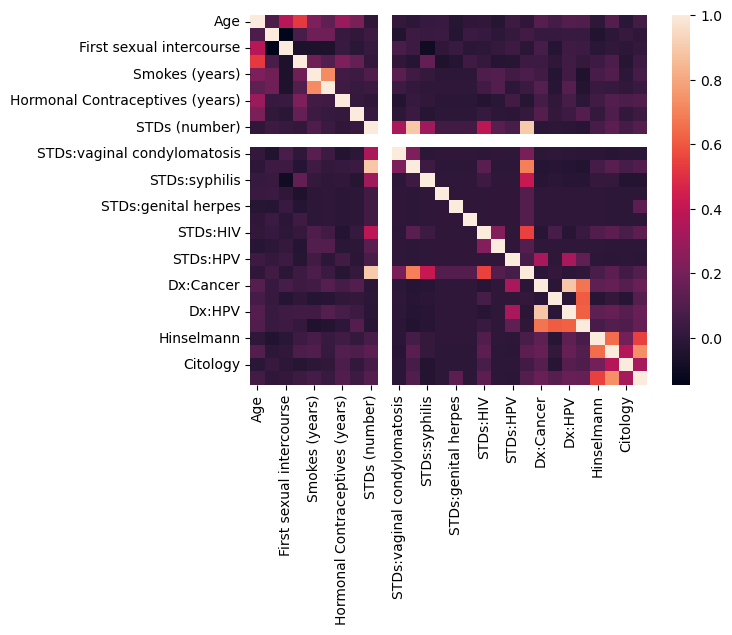

In [17]:
sns.heatmap(df_rf.corr())
df_rf.corr()

#### Dropping columns that are correlated as they have no value for prediction

In [18]:
drop_columns(df_rf,['STDs:cervical condylomatosis'])

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


#### Filling NaN values with dummy values for categorical variables.

In [19]:
df_rf['Number of sexual partners'] = pd.to_numeric(df_rf['Number of sexual partners'])

#### Functions to visualize the different features

In [20]:
def visualize_method_features(df_rf):
    plt.figure(2, figsize=(20, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(x='Hinselmann', data=df_rf)
    plt.title("Patients with Cancer - Hinselmann Method")
    plt.xlabel("Cancer output class")
    x_labels = ["No Cancer", "Has Cancer"]

    plt.subplot(2, 2, 2)
    sns.countplot(x='Schiller', data=df_rf)
    plt.title("Patients with Cancer -  Using Schiller Method")
    plt.xlabel("Cancer output class")
    x_labels = ["No Cancer", "Has Cancer"]

    plt.subplot(2, 2, 3)
    sns.countplot(x='Citology', data=df_rf)
    plt.title("Patients with Cancer -  Using Citology Method")
    plt.xlabel("Cancer output class")
    x_labels = ["No Cancer", "Has Cancer"]

    plt.subplot(2, 2, 4)
    sns.countplot(x='Biopsy', data=df_rf)
    plt.title("Patients with Cancer -  Using Biopsy Method")
    plt.xlabel("Cancer output class")
    x_labels = ["No Cancer", "Has Cancer"]

In [21]:
def visualize_dx_features(df_rf):
    plt.figure(3, figsize=(20, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(x='Dx:Cancer', data=df_rf)
    plt.title("Patients with Cancer Previously Diagnosed with Cancer")
    plt.xlabel("Cancer output class")
    x_labels = ["Never Diagnosed with Cancer", "Previously Diagnosed with Cancer"]
    

    plt.subplot(2, 2, 2)
    sns.countplot(x='Dx:CIN', data=df_rf)
    plt.title("Patients with Cancer Previously Diagnosed with CIN")
    plt.xlabel("Cancer output class")
    x_labels = ["Never Had CIN", "Had CIN"]
    

    plt.subplot(2, 2, 3)
    sns.countplot(x='Dx:HPV', data=df_rf)
    plt.title("Patients with Cancer Previously Diagnosed with HPV")
    plt.xlabel("Cancer output class")
    x_labels = ["Never Had HPV", "Had HPV"]
    

    plt.subplot(2, 2, 4)
    sns.countplot(x='Dx', data=df_rf)
    plt.title("Patients with Cancer Previously Diagnosed with Cervical Cancer")
    plt.xlabel("Cancer output class")
    x_labels = ["Never Diagnosed with Cervical Cancer", "Previously Diagnosed with Cervical Cancer"]


In [22]:
def visualize_age_sex_features(df_rf):

    plt.figure(4, figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.boxplot(df_rf["Age"])
    plt.title("Age of All Patients")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 2)
    plt.boxplot(df_rf["Number of sexual partners"])
    plt.title("Number of Sexual Partners for All Patients")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 3)
    plt.boxplot(df_rf["First sexual intercourse"])
    plt.title("Age of First Sexual Intercourse for All Patients")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 4)
    plt.boxplot(df_rf["Num of pregnancies"])
    plt.title("Number of Past Pregnancies for All Patients")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

In [23]:
def visualize_contraceptives_features(df_rf):
    plt.figure(5, figsize=(20, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(x='Hormonal Contraceptives', data=df_rf)
    plt.title("Patients with Cancer Who Take Hormonal Contraceptives")
    plt.xlabel("Cancer output class")
    x_labels = ["Doesn't have a Hormonal Contraceptives", "Has a Hormonal Contraceptives"]
    

    plt.subplot(2, 2, 2)
    plt.boxplot(df_rf["Hormonal Contraceptives (years)"])
    plt.title("Years the Patients had been taking Hormonal Contraceptives")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 3)
    sns.countplot(x='IUD', data=df_rf)
    plt.title("Patients with Cancer With an IUD")
    plt.xlabel("Cancer output class")
    x_labels = ["Doesn't Have an AUD", "Has an IUD"]
    

    plt.subplot(2, 2, 4)
    plt.boxplot(df_rf["IUD (years)"])
    plt.title("Years the Patients had had a IUD")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

In [24]:
def visualize_smokes_features(df_rf):
    plt.subplot(2, 2, 1)
    sns.countplot(x='Smokes', data=df_rf)
    plt.title("Patients with Cancer Who smoke")
    plt.xlabel("Cancer output class")
    x_labels = ["Doesn't Smoke", "Smokes"]
    

    plt.subplot(2, 2, 2)
    plt.boxplot(df_rf["Smokes (years)"])
    plt.title("Number of Years the Patient Has Been Smoking")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 3)
    plt.boxplot(df_rf["Smokes (packs/year)"])
    plt.title("Number of Packets Smoked Per Year for All Patients")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 4)
    sns.countplot(x='STDs', data=df_rf)
    plt.title("Patients with Cancer With an STD")
    plt.xlabel("Cancer output class")
    x_labels = ["Doesn't Have an STD", "Has STD(s)"]

In [25]:
def visualize_std_features_1(df_rf):
    plt.subplot(2, 2, 1)
    plt.boxplot(df_rf["STDs (number)"])
    plt.title("Number of STDs the Patients have")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 2)
    plt.boxplot(df_rf["STDs: Number of diagnosis"])
    plt.title("The Number of Times the Patients Have Been Diagnosed with an STD")
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplot(2, 2, 3)
    sns.countplot(x='STDs:condylomatosis', data=df_rf)
    plt.title("Patients with Cancer Who Have Condylomatosis")
    plt.xlabel("Cancer output class")
    x_labels = ["No Condylomatosis", "Has Condylomatosis"]
    

    plt.subplot(2, 2, 4)
    sns.countplot(x='STDs:vaginal condylomatosis', data=df_rf)
    plt.title("Patients with Cancer Who Have Vaginal Condylomatosis")
    plt.xlabel("Cancer output class")
    x_labels = ["No Vaginal Condylomatosis", "Has Vaginal Condylomatosis"]


In [26]:
def visualize_std_features_2(df_rf):
    plt.subplot(2, 2, 1)
    sns.countplot(x='STDs:vulvo-perineal condylomatosis', data=df_rf)
    plt.title("Patients with Cancer Who Have Vulvo-Perineal Condylomatosis")
    plt.xlabel("Cancer output class")
    x_labels = ["No Vulvo-Perineal Condylomatosis", "Has Vulvo-Perineal Condylomatosis"]

    plt.subplot(2, 2, 2)
    sns.countplot(x='STDs:syphilis', data=df_rf)
    plt.title("Patients with Cancer Who Have Syphilis")
    plt.xlabel("Cancer output class")
    x_labels = ["No Syphilis", "Has Syphilis"]

    plt.subplot(2, 2, 3)
    sns.countplot(x='STDs:genital herpes', data=df_rf)
    plt.title("Patients with Cancer Who Have Genital Herpes")
    plt.xlabel("Cancer output class")
    x_labels = ["No Genital Herpes", "Has Genital Herpes"]

    plt.subplot(2, 2, 4)
    sns.countplot(x='STDs:molluscum contagiosum', data=df_rf)
    plt.title("Patients with Cancer Who Have Molluscum Contagiosum")
    plt.xlabel("Cancer output class")
    x_labels = ["No Molluscum Contagiosum", "Has Molluscum Contagiosum"]

In [27]:
def visualize_std_features_3(df_rf):
    plt.subplot(2, 2, 1)
    sns.countplot(x='STDs:pelvic inflammatory disease', data=df_rf)
    plt.title("Patients with Cancer Who Have Pelvic Inflammatory Disease")
    plt.xlabel("Cancer output class")
    x_labels = ["No Pelvic Inflammatory Disease", "Has Pelvic Inflammatory Disease"]

    plt.subplot(2, 2, 2)
    sns.countplot(x='STDs:HIV', data=df_rf)
    plt.title("Patients with Cancer Who Have HIV")
    plt.xlabel("Cancer output class")
    x_labels = ["No HIV", "Has HIV"]

    plt.subplot(2, 2, 3)
    sns.countplot(x='STDs:Hepatitis B', data=df_rf)
    plt.title("Patients with Cancer Who Have Hepatitis B")
    plt.xlabel("Cancer output class")
    x_labels = ["No Hepatitis B", "Has Hepatitis B"]

    plt.subplot(2, 2, 4)
    sns.countplot(x='STDs:HPV', data=df_rf)
    plt.title("Patients with Cancer Who Have HPV")
    plt.xlabel("Cancer output class")
    x_labels = ["No HPV", "Has HPV"]
    plt.show()

In [28]:
def cervical_cancer_analysis(risk_factors):
    '''
    This function will accept one parameter risk_factors dataframe : The dataframe that contains the information about patients and their lifestyle that would be helpful in estimating the risk of having cervical cancer.
    
    Definition : It will returns the results of the called based function based on the user input. 
    It is a function that can provide user with an option to select the visualization they want to see. 
    '''
    print ('\tWELCOME TO CERVICAL DISEASES ANALYSIS\n')
    print('1. Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features')
    print('2. Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features')
    print('3. Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features')
    print('4. Visualizing the “Smokes”, "Smokes (years)", "Smokes (packs/year)", "STDs" Features')
    print('5. Visualizing the “STDs (number)”, "STDs: Number of diagnosis", "STDs:condylomatosis", "STDs:vaginal condylomatosis" Features')
    print('6. Visualizing the “STDs:vulvo-perineal condylomatosis”, "STDs:syphilis", "STDs:genital herpes", "STDs:molluscum contagiosum" Features')
    print('7. Visualizing the “STDs:pelvic inflammatory disease”, "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV" Features')
    print("8. Visualize the Contraceptive features")
    
    val=int(input('Choose an analysis to perform:'))
    if val==1:
        print('Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features')
        visualize_method_features(df_rf)
    elif val==2:
        print('Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features')
        visualize_dx_features(df_rf)
    elif val==3:
        print('Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features')
        visualize_age_sex_features(df_rf)
    elif val==4:
        print('Visualizing the “Smokes”, "Smokes (years)", "Smokes (packs/year)", "STDs" Features')
        visualize_smokes_features(df_rf)
    elif val==5:
        print('Visualizing the “STDs (number)”, "STDs: Number of diagnosis", "STDs:condylomatosis", "STDs:vaginal condylomatosis" Features')
        visualize_std_features_1(df_rf)
    elif val==6:
        print('Visualizing the “STDs:vulvo-perineal condylomatosis”, "STDs:syphilis", "STDs:genital herpes", "STDs:molluscum contagiosum" Features')
        visualize_std_features_2(df_rf)
    elif val==7:
        print('Visualizing the “STDs:pelvic inflammatory disease”, "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV" Features')
        visualize_std_features_3(df_rf)
    elif val==8:
        print("Visualize the Contraceptive features")
        visualize_contraceptives_features(df_rf)
    else:
        raise Exception('The code is terminated as the value entered is invalid')
        

	WELCOME TO CERVICAL DISEASES ANALYSIS

1. Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features
2. Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features
3. Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features
4. Visualizing the “Smokes”, "Smokes (years)", "Smokes (packs/year)", "STDs" Features
5. Visualizing the “STDs (number)”, "STDs: Number of diagnosis", "STDs:condylomatosis", "STDs:vaginal condylomatosis" Features
6. Visualizing the “STDs:vulvo-perineal condylomatosis”, "STDs:syphilis", "STDs:genital herpes", "STDs:molluscum contagiosum" Features
7. Visualizing the “STDs:pelvic inflammatory disease”, "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV" Features
8. Visualize the Contraceptive features
Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features


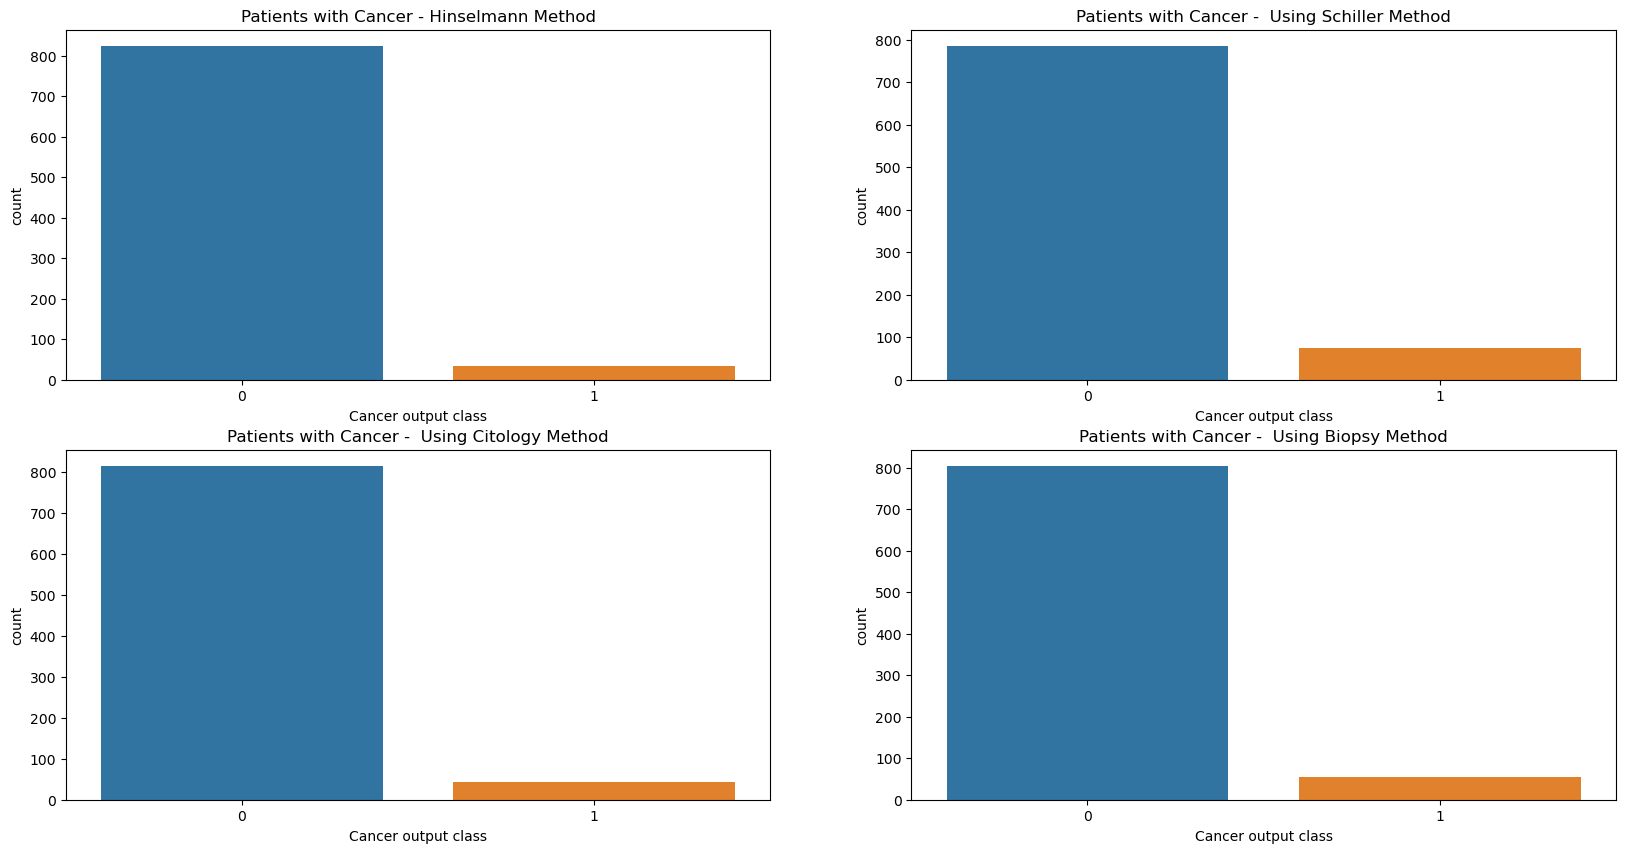

In [29]:
cervical_cancer_analysis(df_rf)

	WELCOME TO CERVICAL DISEASES ANALYSIS

1. Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features
2. Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features
3. Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features
4. Visualizing the “Smokes”, "Smokes (years)", "Smokes (packs/year)", "STDs" Features
5. Visualizing the “STDs (number)”, "STDs: Number of diagnosis", "STDs:condylomatosis", "STDs:vaginal condylomatosis" Features
6. Visualizing the “STDs:vulvo-perineal condylomatosis”, "STDs:syphilis", "STDs:genital herpes", "STDs:molluscum contagiosum" Features
7. Visualizing the “STDs:pelvic inflammatory disease”, "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV" Features
8. Visualize the Contraceptive features
Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features


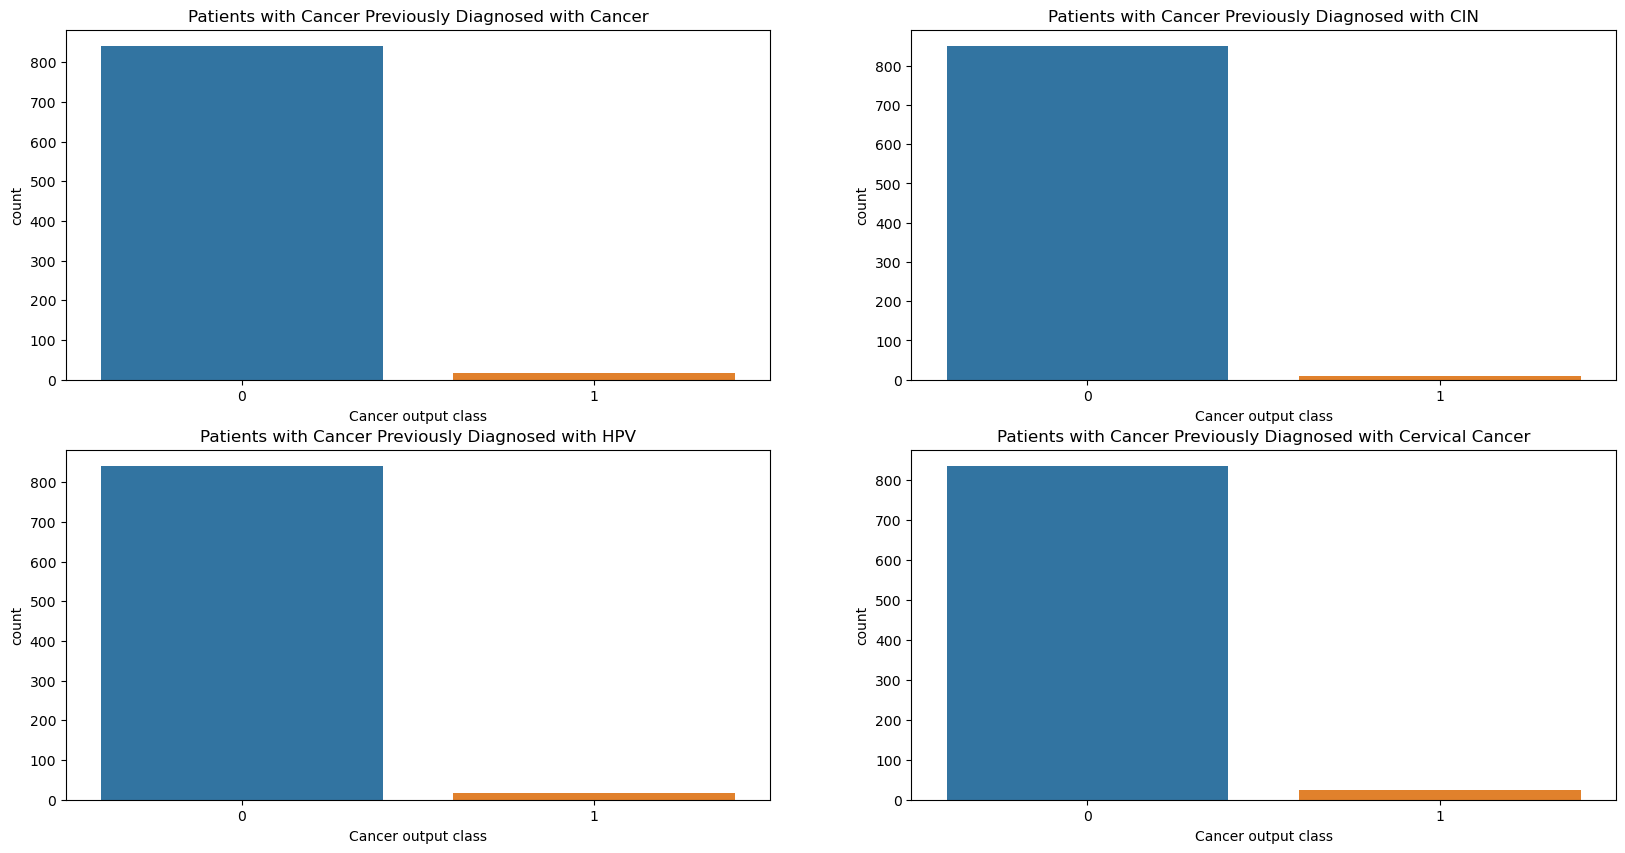

In [30]:
cervical_cancer_analysis(df_rf)

	WELCOME TO CERVICAL DISEASES ANALYSIS

1. Visualize the “Hinselmann”, "Schiller", "Citology", "Biopsy" Features
2. Visualizing the “Dx:Cancer”, "Dx:CIN", "Dx:HPV", "Dx" Features
3. Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features
4. Visualizing the “Smokes”, "Smokes (years)", "Smokes (packs/year)", "STDs" Features
5. Visualizing the “STDs (number)”, "STDs: Number of diagnosis", "STDs:condylomatosis", "STDs:vaginal condylomatosis" Features
6. Visualizing the “STDs:vulvo-perineal condylomatosis”, "STDs:syphilis", "STDs:genital herpes", "STDs:molluscum contagiosum" Features
7. Visualizing the “STDs:pelvic inflammatory disease”, "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV" Features
8. Visualize the Contraceptive features
Visualizing the “Age”, "Number of sexual partners", "First sexual intercourse", "Num of pregnancies" Features


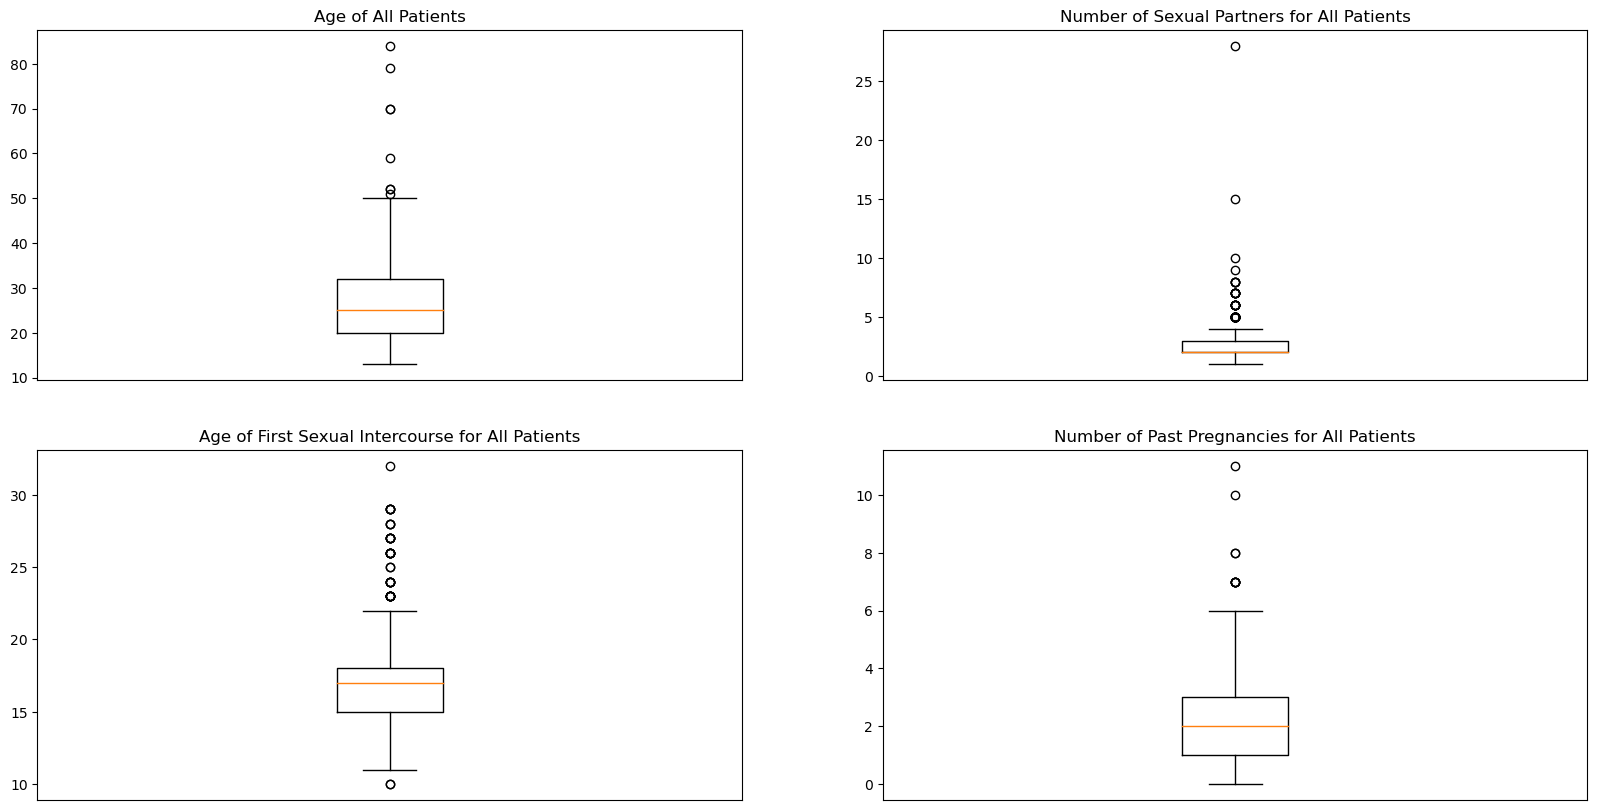

In [32]:
cervical_cancer_analysis(df_rf)

### CONCLUSION:

#### <br> From visualizing the features and seeing the correlation plots I could come to a conclusion that there is a high chances of cancer in the cases where:
<br> Previous diagnosis of the HPV virus.
<br> Previous diagnosis of any cancer.
<br> Previous diagnosis of cervical cancer.
<br> The number of times the patient was diagnosed with an STD.
<br>The number of current STDs the patient has.